#### **``IRIS DATASET``**

In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
type(iris_df)

pandas.core.frame.DataFrame

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

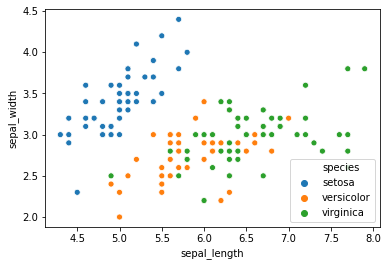

In [6]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=iris_df)

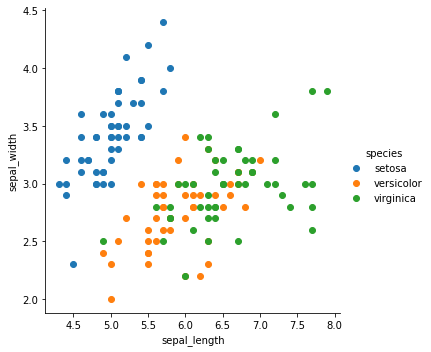

In [7]:
sns.FacetGrid(data=iris_df,hue='species',height=5)\
.map(plt.scatter, 'sepal_length', 'sepal_width')\
.add_legend();
plt.show()

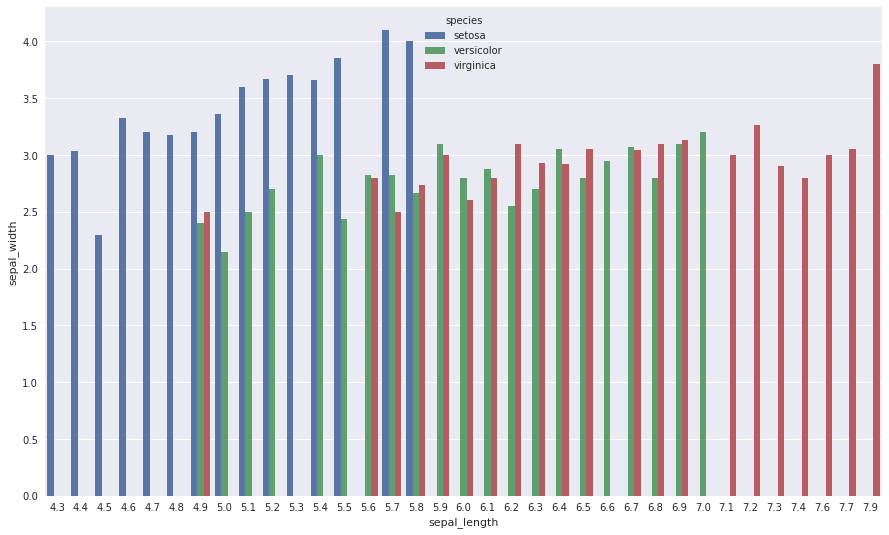

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,9))
    sns.barplot(x='sepal_length',y='sepal_width',hue='species',data=iris_df,ci=False)
plt.show();

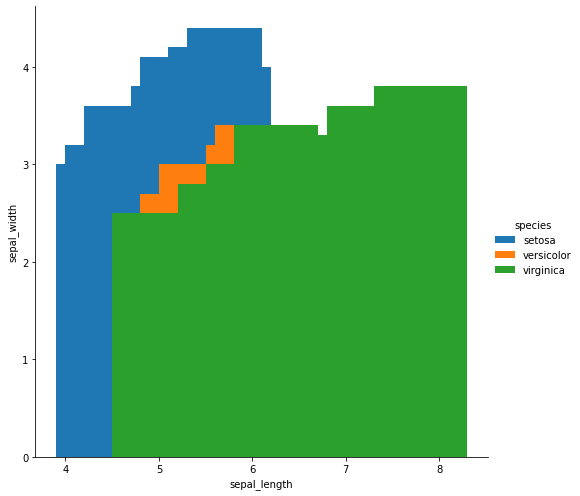

In [9]:
sns.FacetGrid(data=iris_df,hue='species',height=7)\
.map(plt.bar,'sepal_length','sepal_width')\
.add_legend();
plt.show();

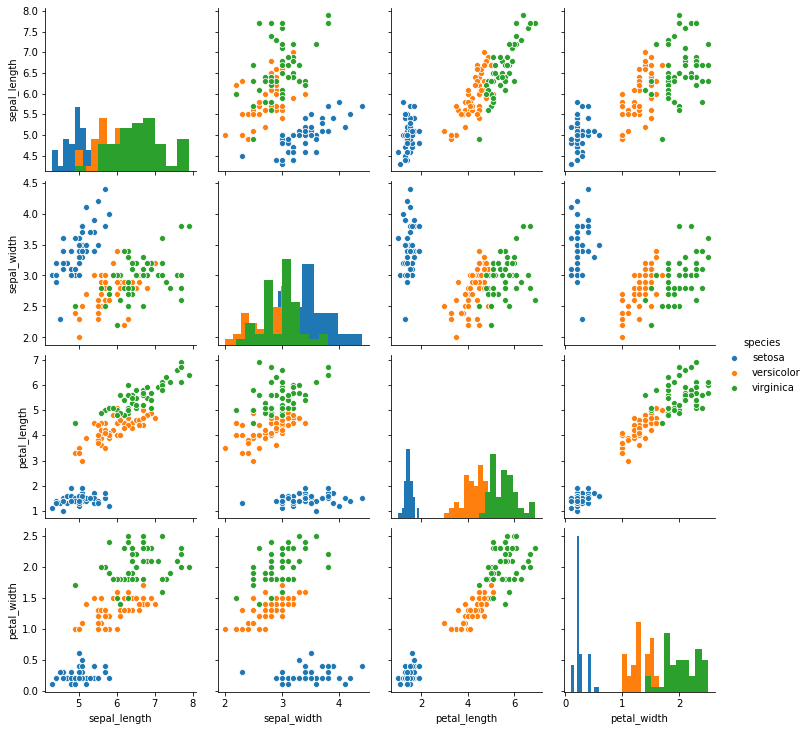

In [10]:
sns.pairplot(data=iris_df,hue='species',diag_kind='hist');
plt.show();

In [11]:
iris_df.loc[iris_df['species'] == 'setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
import scipy
from scipy.stats import norm as nm

In [13]:
petal_length_cdf = nm.cdf(scipy.stats.zscore(iris_df['petal_length']))

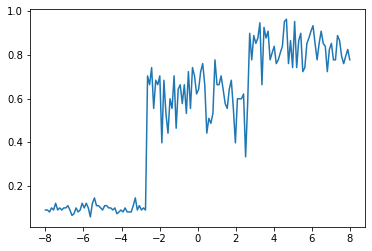

In [14]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),petal_length_cdf);

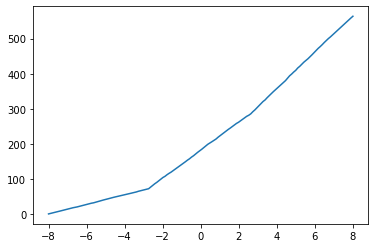

In [15]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),np.cumsum(iris_df['petal_length']));

In [16]:
pd.DataFrame(petal_length_cdf,np.cumsum(iris_df['petal_length']))

,0
petal_length,
1.4,0.090086
2.8,0.090086
4.1,0.081197
5.6,0.099678
7.0,0.090086
...,...
543.0,0.793777
548.0,0.759881
553.2,0.793777


In [17]:
data = pd.concat([pd.DataFrame(nm.cdf(nm.pdf(scipy.stats.zscore(iris_df['petal_length']))))\
          ,pd.DataFrame(np.cumsum(iris_df['petal_length']))],axis=1).reset_index(drop=True)

data.columns = ['col1_zscore','col2']

In [18]:
data.head()

,col1_zscore,col2
0,0.564546,1.4
1,0.564546,2.8
2,0.559753,4.1
3,0.569494,5.6
4,0.564546,7.0


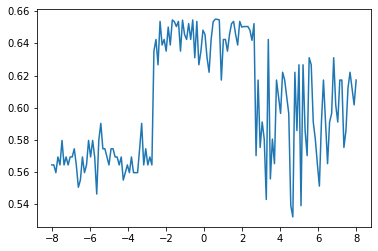

In [19]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),data['col1_zscore']);

In [20]:
dummy_data = np.array([10,10,20,20,20,35,35,35,35,35,50,50,40,55,55,55,60,60,60,60,60,60,60,60,62,62,70,70,70])

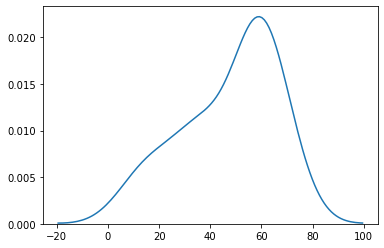

In [21]:
sns.kdeplot(dummy_data);

In [22]:
print('Mean ',np.mean(dummy_data))
print('Median ',np.median(dummy_data))
print('Mean ',scipy.stats.mode(dummy_data))

Mean  47.37931034482759
Median  55.0
Mean  ModeResult(mode=array([60]), count=array([8]))


In [23]:
np.var(dummy_data), np.std(dummy_data)

(320.3043995243758, 17.89705002296121)

In [24]:
55+17, 60+17

(72, 77)

In [25]:
np.histogram(dummy_data,density=True)

(array([0.01149425, 0.01724138, 0.        , 0.        , 0.02873563,
        0.00574713, 0.01149425, 0.01724138, 0.05747126, 0.01724138]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]))

In [26]:
cnt , edge = np.histogram(dummy_data,density=True)

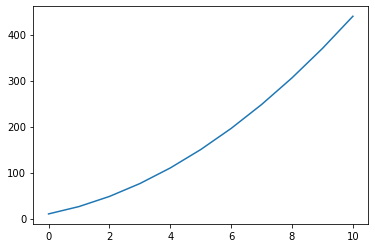

In [27]:
plt.plot(np.cumsum(edge))

In [28]:
from scipy.spatial import minkowski_distance as mkd

In [29]:
P = np.array([10,5,7,8,9])
Q = np.array([30,4,5,6,8])

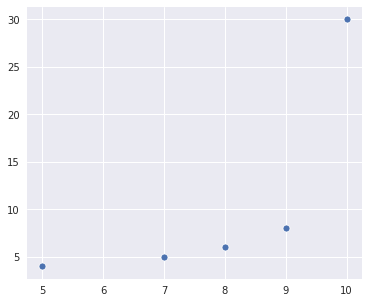

In [30]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(6,5))
    sns.scatterplot(P,Q,)

In [31]:
mkd(P,Q,1),mkd(P,Q,2),mkd(P,Q,3),mkd(P,Q,5),mkd(P,Q,10),mkd(P,Q,50)

(26.0,
 20.248456731316587,
 20.014988764041437,
 20.000082499319387,
 20.000000000400394,
 20.0)

### **``REVISION --> Module-1 and Module-2 (Section 1 & 2)``**

In [32]:
tup1 = (6,7,8)

In [33]:
tup1[0]

6

In [34]:
set1 = set((5,6,7))

In [35]:
set1

{5, 6, 7}

In [36]:
names = ['Rajesh','Ram','Ramu','Shyamu']

In [37]:
sorted(names,key=len)

['Ram', 'Ramu', 'Rajesh', 'Shyamu']

In [38]:
players = {'f_name':['MS','Virat','Sachin','Saurav'],
           'l_name':['Dhoni','Kohli','Tendulkar','Gangully']}

In [39]:
players

{'f_name': ['MS', 'Virat', 'Sachin', 'Saurav'],
 'l_name': ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']}

In [40]:
players.keys()

dict_keys(['f_name', 'l_name'])

In [41]:
players.values()

dict_values([['MS', 'Virat', 'Sachin', 'Saurav'], ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']])

In [42]:
for idx, value in enumerate(players.values()):
    print('Index location is {}'.format(idx))
    print('Value is {}'.format(value))
    print('%%%%%%\n')

Index location is 0
Value is ['MS', 'Virat', 'Sachin', 'Saurav']
%%%%%%

Index location is 1
Value is ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']
%%%%%%



In [43]:
5 // 2             ## Floor division

2

In [44]:
divmod(5,2)        ## Returns Floor and Modulo Division

(2, 1)

In [45]:
player_order = ['Open','1-down','Middle order','Lower order']
player_name = ['Rohit','Virat','MS','Bumrah']

In [46]:
order_plys = list(zip(player_order,player_name))

In [47]:
all_details = []
for idx, plyr_detail in enumerate(order_plys):
    print(idx,'-->',plyr_detail)
    for val in plyr_detail:
        print(val)
        all_details.append(val)

0 --> ('Open', 'Rohit')
Open
Rohit
1 --> ('1-down', 'Virat')
1-down
Virat
2 --> ('Middle order', 'MS')
Middle order
MS
3 --> ('Lower order', 'Bumrah')
Lower order
Bumrah


In [48]:
all_details

['Open',
 'Rohit',
 '1-down',
 'Virat',
 'Middle order',
 'MS',
 'Lower order',
 'Bumrah']

In [49]:
players

{'f_name': ['MS', 'Virat', 'Sachin', 'Saurav'],
 'l_name': ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']}

In [50]:
def get_details(f_name,l_name):
    print('first_name',f_name)
    print('Last name',l_name)

In [51]:
get_details(**players)

first_name ['MS', 'Virat', 'Sachin', 'Saurav']
Last name ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']


In [52]:
all_details,player_order

(['Open',
  'Rohit',
  '1-down',
  'Virat',
  'Middle order',
  'MS',
  'Lower order',
  'Bumrah'],
 ['Open', '1-down', 'Middle order', 'Lower order'])

In [53]:
def get_list_details(*names):
    for name in names:
        print(name)

In [54]:
get_list_details(all_details,players,player_order)

['Open', 'Rohit', '1-down', 'Virat', 'Middle order', 'MS', 'Lower order', 'Bumrah']
{'f_name': ['MS', 'Virat', 'Sachin', 'Saurav'], 'l_name': ['Dhoni', 'Kohli', 'Tendulkar', 'Gangully']}
['Open', '1-down', 'Middle order', 'Lower order']


In [55]:
import os
import sys
import shutil
import pdb

In [56]:
def get_via_kwargs(**kwargs):
    print(kwargs['f_name'])
    pdb.set_trace()
    print(kwargs['l_name'])

In [57]:
get_via_kwargs(f_name=[1,2,3],l_name=[6,7,8])

[1, 2, 3]
> <ipython-input-56-666a6aa5dad3>(4)get_via_kwargs()
      1 def get_via_kwargs(**kwargs):
      2     print(kwargs['f_name'])
      3     pdb.set_trace()
----> 4     print(kwargs['l_name'])



ipdb>  c


[6, 7, 8]


In [58]:
with open('file_manipulations.txt',encoding='utf-8') as f:
    data = f.readlines()

In [59]:
data

["I'm Rajesh Sharma and one day I'll be a Data Scientist."]

In [60]:
file_obj = open('file_manipulations.txt','r')

In [61]:
new_data1 = file_obj.readlines()

In [62]:
new_data1

["I'm Rajesh Sharma and one day I'll be a Data Scientist."]

In [63]:
file_obj.seek(22)

22

In [64]:
file_obj.tell()

22

In [65]:
file_obj.read()

"one day I'll be a Data Scientist."

In [66]:
file_obj.seek(0)

0

In [67]:
file_obj.read()

"I'm Rajesh Sharma and one day I'll be a Data Scientist."

In [68]:
with open('file_manipulations.txt') as file1:
    print(file1.readlines())

["I'm Rajesh Sharma and one day I'll be a Data Scientist."]


In [69]:
print(dir(shutil))

['Error', 'ExecError', 'ReadError', 'RegistryError', 'SameFileError', 'SpecialFileError', '_ARCHIVE_FORMATS', '_BZ2_SUPPORTED', '_LZMA_SUPPORTED', '_UNPACK_FORMATS', '_ZLIB_SUPPORTED', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_basename', '_check_unpack_options', '_copyxattr', '_destinsrc', '_ensure_directory', '_find_unpack_format', '_get_gid', '_get_uid', '_make_tarball', '_make_zipfile', '_ntuple_diskusage', '_rmtree_safe_fd', '_rmtree_unsafe', '_samefile', '_unpack_tarfile', '_unpack_zipfile', '_use_fd_functions', 'chown', 'collections', 'copy', 'copy2', 'copyfile', 'copyfileobj', 'copymode', 'copystat', 'copytree', 'disk_usage', 'errno', 'fnmatch', 'get_archive_formats', 'get_terminal_size', 'get_unpack_formats', 'getgrnam', 'getpwnam', 'ignore_patterns', 'make_archive', 'move', 'nt', 'os', 'register_archive_format', 'register_unpack_format', 'rmtree', 'stat', 'sys', 'unpack_archive', 'unregister_archive_f

In [70]:
shutil.move('excel1.xlsx',str(os.getcwd()+'\\NOTES'))

'E:\\STUDY\\PROJECTS\\AAIC_Practice\\VIDEO_PRACTICE\\MODULE-1\\NOTES\\excel1.xlsx'

In [71]:
shutil.move(os.getcwd()+'\\NOTES\\excel1.xlsx',os.getcwd())

'E:\\STUDY\\PROJECTS\\AAIC_Practice\\VIDEO_PRACTICE\\MODULE-1\\excel1.xlsx'

In [72]:
player_name, player_order

(['Rohit', 'Virat', 'MS', 'Bumrah'],
 ['Open', '1-down', 'Middle order', 'Lower order'])

In [73]:
players_df = pd.DataFrame(players)

In [74]:
players_df

,f_name,l_name
0,MS,Dhoni
1,Virat,Kohli
2,Sachin,Tendulkar
3,Saurav,Gangully


### **``SKEW and KURTOSIS``**

In [75]:
dummy_arr1 = np.random.randint(low=5,high=500,size=70,dtype=np.int)

In [76]:
from scipy.stats import skew as skw, \
                        skewtest as skwt, \
                        kurtosis as kur, \
                        kurtosistest as kurt, \
                        normaltest as nmt

In [77]:
dummy_arr2 = np.append(dummy_arr1,[-100,-200,-50,-60,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2100])

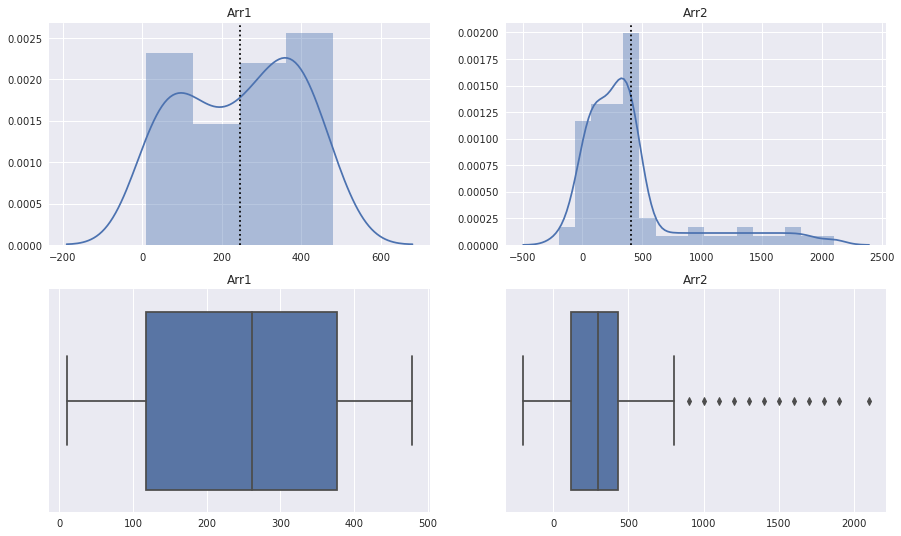

In [78]:
with plt.style.context('seaborn'):
    fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,9))
    sns.distplot(dummy_arr1,ax=ax1)
    ax1.axvline(np.mean(dummy_arr1),c='k',linestyle=':')
    ax1.set_title('Arr1')
    sns.distplot(dummy_arr2,ax=ax2)
    ax2.axvline(np.mean(dummy_arr2),c='k',linestyle=':')
    ax2.set_title('Arr2')    
    sns.boxplot(dummy_arr1,ax=ax3)
    ax3.set_title('Arr1')
    sns.boxplot(dummy_arr2,ax=ax4)
    ax4.set_title('Arr2')

In [79]:
skw(dummy_arr1), skw(dummy_arr2)                         ## Biased Skew of both the arrays

(-0.12312060354536271, 1.898393581191812)

In [80]:
skw(dummy_arr1,bias=False), skw(dummy_arr2,bias=False)   ## Un-Biased Skew of both the arrays

(-0.125833242700043, 1.9310936846806006)

In [81]:
nmt(dummy_arr1),nmt(dummy_arr2)   ## p-value of arr2 is highly significant(<0.05) which tells us that its not like normal distn

(NormaltestResult(statistic=33.83494819619746, pvalue=4.4960833263192054e-08),
 NormaltestResult(statistic=42.98896695239412, pvalue=4.624496285285009e-10))

In [82]:
skwt(dummy_arr1),skwt(dummy_arr2) ## p-value of arr2 is highly significant(<0.05) which tells us that its skew is not like normal distn

(SkewtestResult(statistic=-0.45596986506501286, pvalue=0.6484116482984876),
 SkewtestResult(statistic=5.580805769783302, pvalue=2.3940687420458243e-08))

In [83]:
kur(dummy_arr1,fisher=False), kur(dummy_arr2,fisher=False)            ## Biased Kurtosis of both the arrays

(1.678058138562882, 6.146568829716922)

In [84]:
kur(dummy_arr1), kur(dummy_arr2)                                      ## Biased Excess Kurtosis of both the arrays

(-1.321941861437118, 3.146568829716922)

In [85]:
kur(dummy_arr1,fisher=False,bias=False), kur(dummy_arr2,fisher=False,bias=False)   ## Unbiased Kurtosis of both the arrays

(1.6694044821816418, 6.401339899940928)

In [86]:
kur(dummy_arr1,bias=False), kur(dummy_arr2,bias=False)                ## Unbiased Excess Kurtosis of both the arrays

(-1.3305955178183582, 3.401339899940928)

In [87]:
kurt(dummy_arr1), kurt(dummy_arr2) ## p-value of arr2 is highly significant(<0.05) which tells us that its kurtosis is not like normal distn

(KurtosistestResult(statistic=-5.798882623260282, pvalue=6.675823663881391e-09),
 KurtosistestResult(statistic=3.441449391222764, pvalue=0.0005786066967210859))

### **``KDE Plot``**

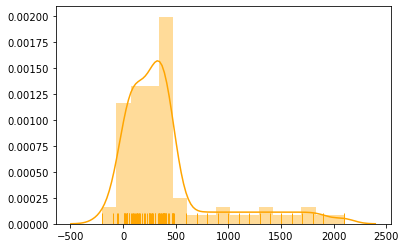

In [88]:
sns.distplot(dummy_arr2,rug=True,color='orange');

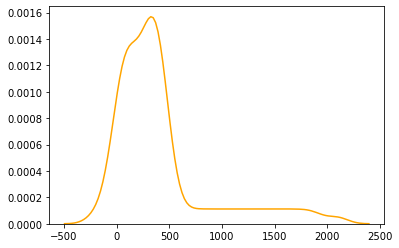

In [89]:
sns.kdeplot(dummy_arr2,color='orange');

In [90]:
from sklearn.neighbors import KernelDensity

In [91]:
kde = KernelDensity(bandwidth=5)

In [92]:
kde.fit(dummy_arr2.reshape(1,-1))

KernelDensity(bandwidth=5)

### **``QQ Plot``**

In [93]:
data_qq = np.random.normal(20,5,1000)

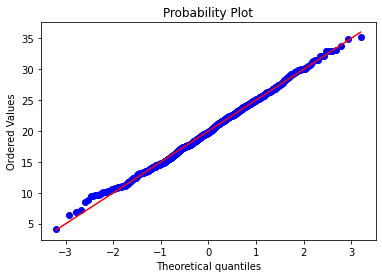

In [94]:
scipy.stats.probplot(data_qq,plot=plt)
plt.show();

In [95]:
from statsmodels import api as sm_api

In [96]:
prob_plot = sm_api.ProbPlot(dummy_arr2)

In [97]:
np.percentile(dummy_arr2,1)

-112.0

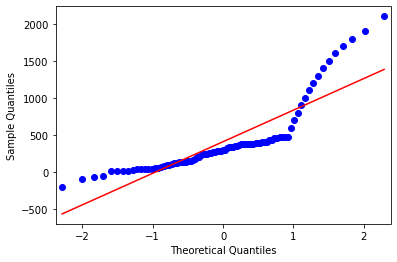

In [98]:
prob_plot.qqplot(line='r');

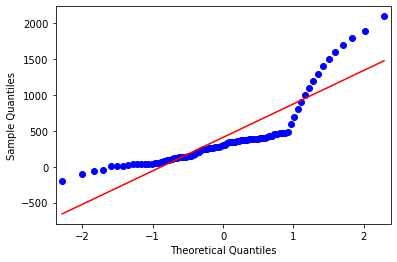

In [99]:
prob_plot.qqplot(line='s');

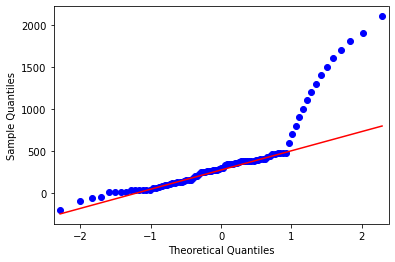

In [100]:
prob_plot.qqplot(line='q');

In [101]:
prob_plot = sm_api.ProbPlot(dummy_arr2)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
ss = StandardScaler()

In [104]:
dummy_arr2_st = ss.fit_transform(pd.DataFrame(dummy_arr2))

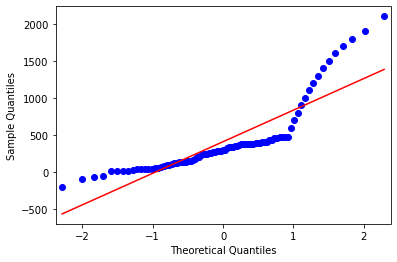

In [105]:
prob_plot.qqplot(line='r');

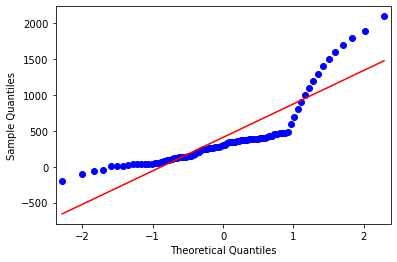

In [106]:
prob_plot.qqplot(line='s');

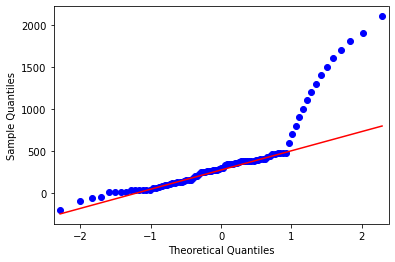

In [107]:
prob_plot.qqplot(line='q');

### **``Uniformly distributed random numbers``**

In [108]:
import random

In [109]:
random.random()

0.052899695890962106

In [110]:
random.randint(5,90)

60

In [111]:
random.randrange(5,50,1)

19

In [112]:
np.random.rand(), np.random.randint(4,90,size=5)

(0.6645071885332274, array([23, 64, 57, 32, 48]))

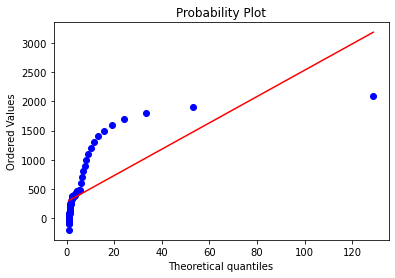

In [113]:
scipy.stats.probplot(dummy_arr2,dist='pareto',sparams=(1,0),plot=plt);

### **``PARETO DISTRIBUTION``**
##### **These are the distribution that follows POWER-LAW or 80-20 rule and have heavy tail on the right side.** 

In [114]:
from scipy.stats import pareto

In [115]:
x_m = 1
alpha = [1,2,3]
measurements = np.linspace(start=1,stop=5,num=5000)

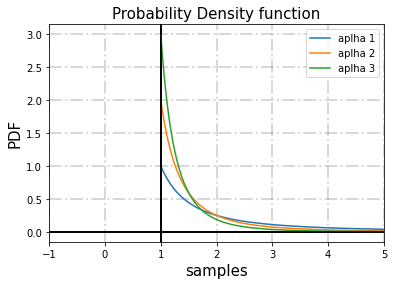

In [116]:
for a in alpha:
    output = np.array([pareto.pdf(x=measurements,b=a,loc=0,scale=x_m)])
    plt.plot(measurements,output.T,label='aplha {}'.format(a))
    plt.axvline(x=1,color='k')
    plt.axhline(y=0,xmin=0,color='k')

plt.xlabel('samples', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [9, 5]
plt.axis(xmin=-1,xmax=5)
plt.legend(loc='best') 
plt.show()

#### **``PARETO Data``**

In [117]:
pareto_data = (np.random.pareto(15,100000) + 1) * 10

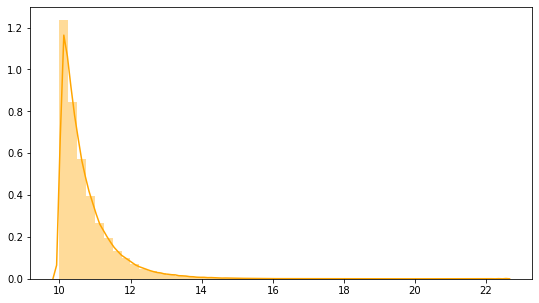

In [118]:
sns.distplot(pareto_data,color='orange')
plt.show()

#### **``Q-Q Plot of PARETO data``**

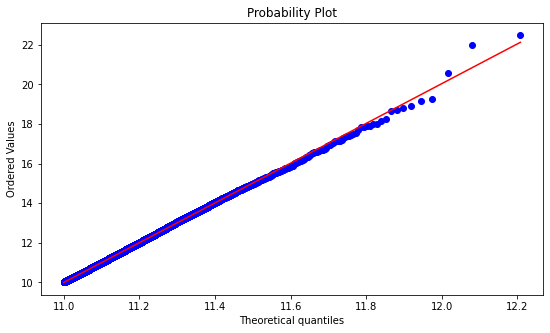

In [119]:
scipy.stats.probplot(pareto_data,dist='pareto',sparams=(15,10),plot=plt);

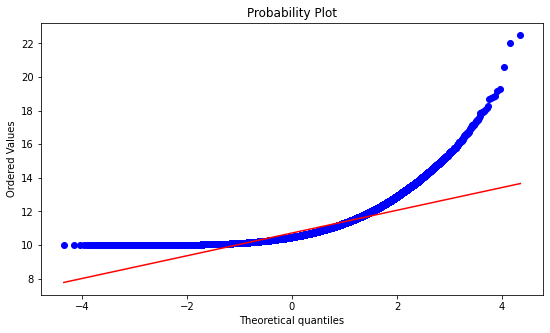

In [120]:
scipy.stats.probplot(pareto_data,dist='norm',sparams=(0,1),plot=plt);

#### **``Running Statistical Tests on PARETO data``**

In [121]:
from scipy.stats import normaltest as nmt, anderson as andr

In [122]:
nmt(pareto_data)

NormaltestResult(statistic=54370.082691384734, pvalue=0.0)

In [123]:
nm_data = np.random.normal(size=10000)

In [124]:
andr(nm_data)

AndersonResult(statistic=0.5314139472266106, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [125]:
andr(pareto_data)

AndersonResult(statistic=5625.459907133234, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### **``BOX-COX``**

In [126]:
from scipy.stats import boxcox

In [127]:
pareto_data_power_trans, lmda = boxcox(pareto_data)

In [128]:
pareto_data_power_trans

array([0.09375943, 0.09375943, 0.09375943, ..., 0.09375943, 0.09375943,
       0.09375943])

In [129]:
lmda

-10.665594278991254

In [130]:
(pareto_data**lmda -1)/lmda

array([0.09375943, 0.09375943, 0.09375943, ..., 0.09375943, 0.09375943,
       0.09375943])

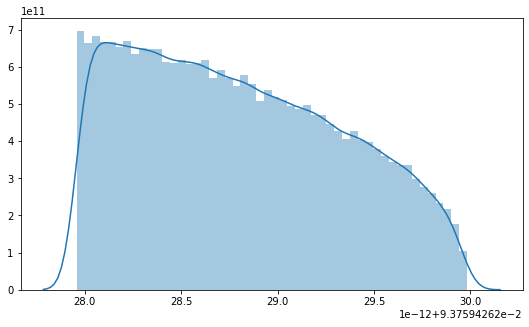

In [131]:
sns.distplot(pareto_data_power_trans);

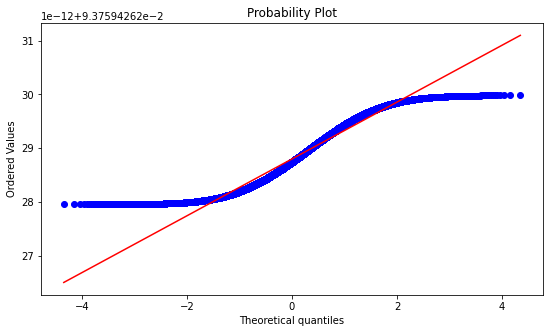

In [132]:
scipy.stats.probplot(pareto_data_power_trans,plot=plt);

In [133]:
nmt(pareto_data_power_trans)

NormaltestResult(statistic=24164.549269446776, pvalue=0.0)

In [134]:
andr(pareto_data_power_trans)

AndersonResult(statistic=1073.1281031847175, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### **``BOX-COX Transformation on LOG-GAMMA Distributions``**

In [135]:
loggamma_data = scipy.stats.loggamma.rvs(5,size=5000)+5

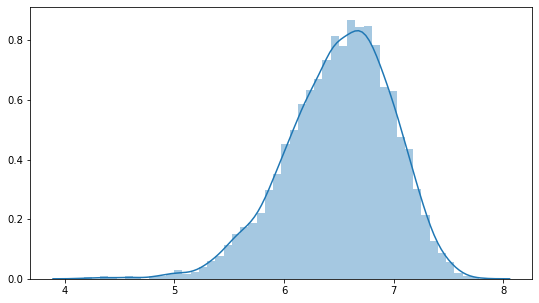

In [136]:
sns.distplot(loggamma_data);

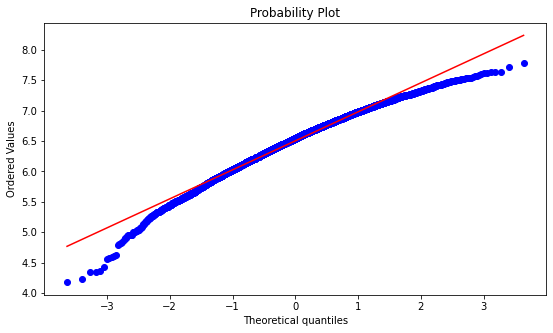

In [137]:
scipy.stats.probplot(loggamma_data,plot=plt);

In [138]:
nmt(loggamma_data), andr(loggamma_data)

(NormaltestResult(statistic=266.28626723571244, pvalue=1.5020063421430299e-58),
 AndersonResult(statistic=15.013705234624467, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

In [139]:
loggamma_data_power_trans, _lmda = scipy.stats.boxcox(loggamma_data)

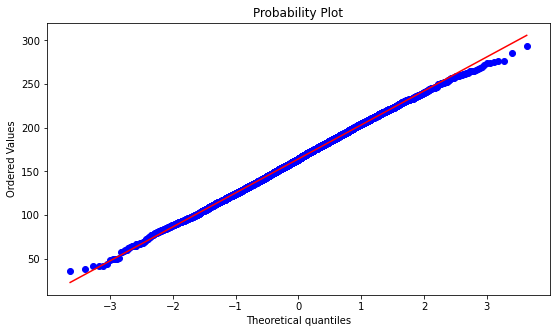

In [140]:
scipy.stats.probplot(loggamma_data_power_trans,plot=plt);

In [141]:
nmt(loggamma_data_power_trans), andr(loggamma_data_power_trans)

(NormaltestResult(statistic=14.051509138286125, pvalue=0.0008886966834460246),
 AndersonResult(statistic=0.929768277279436, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

### **``BOX-COX NORMPLOT``**

In [142]:
_lmda

3.362925994131384

In [143]:
loggamma_data_power_trans

array([179.20075756, 195.44966787, 191.08472997, ..., 177.70425794,
       190.49607621, 185.64157162])

In [144]:
(loggamma_data**_lmda -1) / _lmda

array([179.20075756, 195.44966787, 191.08472997, ..., 177.70425794,
       190.49607621, 185.64157162])

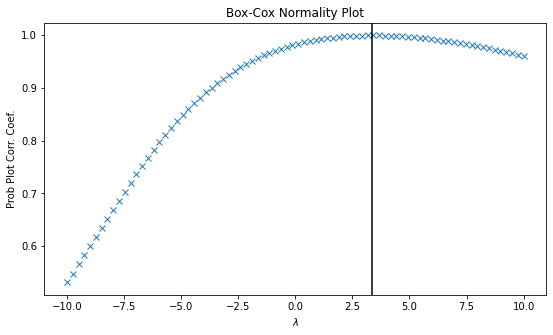

In [145]:
scipy.stats.boxcox_normplot(loggamma_data,-10,10,plot=plt)
plt.axvline(_lmda,color='k')
plt.show()

##### **One point to remember here is that BOX-COX doesn't work on every heavy tailed or power-law following distributions but it does tends to work for some transformations following the power-law.**

### **``Applying YEO-JOHNSON on above pareto or heavy-tailed data``**
##### **``BOX-COX failed to convert this data into a normal distribution``**

In [146]:
from scipy.stats import yeojohnson

In [147]:
pareto_data

array([10.13759525, 10.43686803, 10.6328243 , ..., 10.53964252,
       10.97657476, 10.48920295])

In [148]:
pareto_data_yeo_trans, pareto_data_yeo_lmda = yeojohnson(pareto_data)

In [149]:
pareto_data_yeo_trans

array([0.08555634, 0.08555634, 0.08555634, ..., 0.08555634, 0.08555634,
       0.08555634])

In [150]:
pareto_data_yeo_lmda

-11.688204231966774

In [151]:
((pareto_data+1)**(pareto_data_yeo_lmda)-1)/pareto_data_yeo_lmda  ## working of yeo-johnson transformer

array([0.08555634, 0.08555634, 0.08555634, ..., 0.08555634, 0.08555634,
       0.08555634])

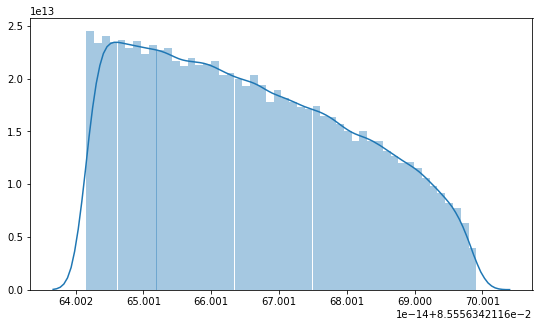

In [152]:
sns.distplot(pareto_data_yeo_trans);

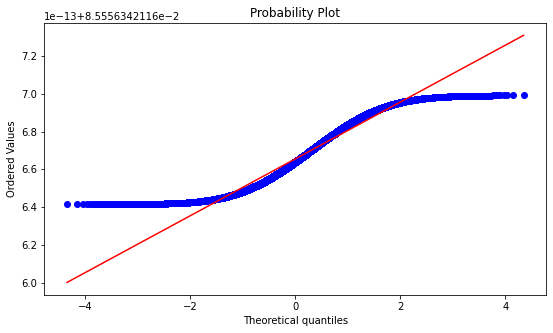

In [153]:
scipy.stats.probplot(pareto_data_yeo_trans,plot=plt);

In [154]:
nmt(pareto_data_yeo_trans)

NormaltestResult(statistic=24127.11391458076, pvalue=0.0)

In [155]:
andr(pareto_data_yeo_trans)

AndersonResult(statistic=1084.2727990255516, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

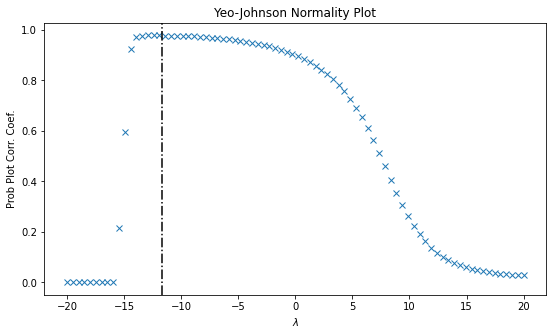

In [156]:
scipy.stats.yeojohnson_normplot(pareto_data,-20,20,plot=plt)
plt.axvline(pareto_data_yeo_lmda,color='k',linestyle='-.')
plt.show()

### **``BOOTSTRAPPING``**

In [157]:
main_sample = np.array([200,300,205,250,320,450,670,890,990,880])

In [158]:
np.mean(main_sample), np.median(main_sample)

(515.5, 385.0)

In [159]:
from sklearn.utils import resample

In [160]:
no_of_bootstrap_samples = 10000
bootstrap_sample_size = len(main_sample)

In [161]:
bootstrap_medians = []

In [162]:
for itr in range(no_of_bootstrap_samples):
    tmp_sample = resample(main_sample,n_samples=bootstrap_sample_size,replace=True)
    tmp_median = np.median(tmp_sample)
    bootstrap_medians.append(tmp_median)

In [163]:
len(bootstrap_medians)

10000

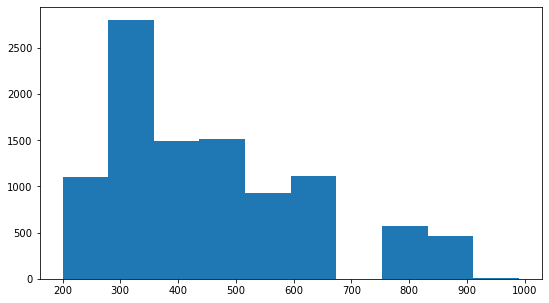

In [164]:
plt.hist(bootstrap_medians);

In [165]:
np.mean(bootstrap_medians), np.median(bootstrap_medians)

(454.82125, 385.0)

In [166]:
lower_int, upper_int = (((1 - 0.95)/2)*100), (((1 - 0.95)/2)+0.95)*100

In [167]:
np.percentile(bootstrap_medians,lower_int), np.percentile(bootstrap_medians,upper_int)

(250.0, 880.0)

In [171]:
players_df['high_score'] = [185,164,183,184]

In [172]:
players_df

,f_name,l_name,high_score
0,MS,Dhoni,185
1,Virat,Kohli,164
2,Sachin,Tendulkar,183
3,Saurav,Gangully,184


In [175]:
players_df.cov()

,high_score
high_score,100.666667


In [177]:
np.square(players_df.corr())

,high_score
high_score,1.0


In [178]:
from scipy import stats

In [179]:
slope, intercept, r_value, p_value, std_err = stats.linregress(players_df['high_score'],players_df['high_score'])

In [181]:
slope, intercept, r_value, p_value, std_err, r_value**2

(1.0, 0.0, 1.0, 9.999999999999998e-21, 0.0, 1.0)